In [1]:
import csv

# Define the path to your CSV file
csv_file_path = "C:/Users/KarangulaTunisha/Downloads/twitter_training.csv (2)/twitter_training.csv"

# Open the CSV file
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Access each column in the row
        column1 = row[0]  # Assuming the first column
        column2 = row[1]  # Assuming the second column
        # Add more columns as needed
        
        # Perform operations with the data
        # For example, print the values of the columns
        print(f"Column 1: {column1}, Column 2: {column2}")

Column 1: Name, Column 2: Age
Column 1: John, Column 2: 30
Column 1: Alice, Column 2: 25
Column 1: Bob, Column 2: 35
Column 1: Eve, Column 2: 40
Column 1: Michael, Column 2: 45


In [2]:
import csv

# Define the path to your CSV file
csv_file_path = "C:/Users/KarangulaTunisha/Downloads/twitter_training.csv (2)/twitter_training.csv"

# Open the CSV file
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Access data in each row using column headers
        name = row['Name']
        age = row['Age']
        city = row['City']
        print(f"Name: {name}, Age: {age}, City: {city}")



Name: John, Age: 30, City: New York
Name: Alice, Age: 25, City: Los Angeles
Name: Bob, Age: 35, City: Chicago
Name: Eve, Age: 40, City: Houston
Name: Michael, Age: 45, City: Miami


Column Names: ['Name', 'Age', 'City']


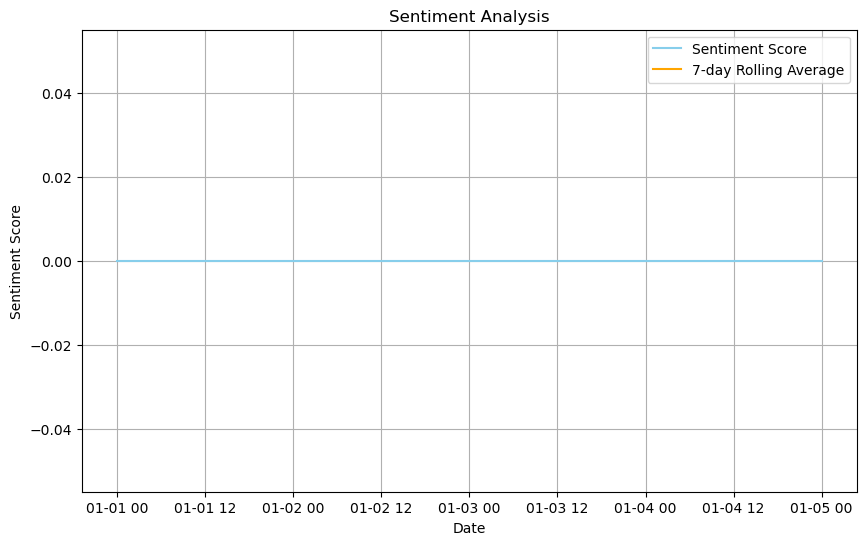

Overall neutral sentiment.


In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read Data from CSV File
def read_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        column_names = reader.fieldnames
        print("Column Names:", column_names)  # Print column names
        data = [row[column_names[0]] for row in reader]  # Assuming the first column contains the text data
    return data


# Step 2: Perform Sentiment Analysis
def analyze_sentiment(text):
    positive_words = ['good', 'great', 'excellent', 'awesome', 'fantastic']
    negative_words = ['bad', 'poor', 'terrible', 'awful', 'horrible']

    # Count positive and negative words in the text
    num_positive = sum(text.lower().count(word) for word in positive_words)
    num_negative = sum(text.lower().count(word) for word in negative_words)

    # Calculate sentiment score
    sentiment_score = (num_positive - num_negative) / max(len(text.split()), 1)  # Avoid division by zero

    return sentiment_score

# Step 3: Aggregate Sentiment Scores
def aggregate_sentiment(data):
    sentiment_scores = [analyze_sentiment(text) for text in data]
    return sentiment_scores

# Step 4: Visualize Sentiment Patterns
def visualize_sentiment(sentiment_scores):
    df = pd.DataFrame(sentiment_scores, columns=['Sentiment'])
    df['Date'] = pd.date_range(start='1/1/2022', periods=len(sentiment_scores), freq='D')
    df.set_index('Date', inplace=True)
    df['Rolling Average'] = df['Sentiment'].rolling(window=7).mean()  # 7-day rolling average

    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Sentiment'], label='Sentiment Score', color='skyblue')
    plt.plot(df.index, df['Rolling Average'], label='7-day Rolling Average', color='orange')
    plt.title('Sentiment Analysis')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Interpretation and Insights
def interpret_sentiment(sentiment_scores):
    avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    if avg_sentiment > 0:
        print("Overall positive sentiment.")
    elif avg_sentiment < 0:
        print("Overall negative sentiment.")
    else:
        print("Overall neutral sentiment.")

# Main function
def main():
    file_path = "C:/Users/KarangulaTunisha/Downloads/twitter_training.csv (2)/twitter_training.csv"

    # Step 1: Read Data from CSV File
    data = read_csv(file_path)

    # Step 2: Perform Sentiment Analysis
    sentiment_scores = aggregate_sentiment(data)

    # Step 4: Visualize Sentiment Patterns
    visualize_sentiment(sentiment_scores)

    # Step 5: Interpretation and Insights
    interpret_sentiment(sentiment_scores)

if __name__ == "__main__":
    main()
